In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import catboost
from catboost import Pool
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from xgboost import plot_importance
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [3]:
test=pd.read_csv('test.csv')
items=pd.read_csv('items.csv')
cats=pd.read_csv('item_categories.csv')
shops=pd.read_csv('shops.csv')
train=pd.read_csv('sales_train.csv')
sample=pd.read_csv('sample_submission.csv')

In [4]:
test.isna().sum()

ID         0
shop_id    0
item_id    0
dtype: int64

In [5]:
items.isna().sum()

item_name           0
item_id             0
item_category_id    0
dtype: int64

In [6]:
cats.isna().sum()

item_category_name    0
item_category_id      0
dtype: int64

In [7]:
shops.isna().sum()

shop_name    0
shop_id      0
dtype: int64

In [8]:
train.isna().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [9]:
test.isnull().sum()

ID         0
shop_id    0
item_id    0
dtype: int64

In [10]:
train.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [11]:
cats.isnull().sum()

item_category_name    0
item_category_id      0
dtype: int64

In [12]:
shops.isnull().sum()

shop_name    0
shop_id      0
dtype: int64

In [13]:
items.isnull().sum()

item_name           0
item_id             0
item_category_id    0
dtype: int64

In [14]:
train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


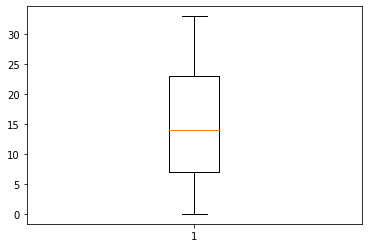

In [15]:
plt.boxplot(x=train['date_block_num'])
plt.show()

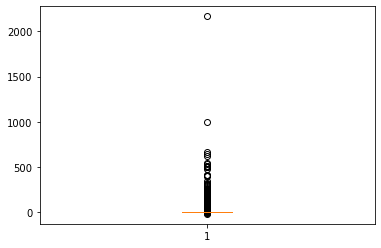

In [16]:
# 2000, 1000이 넘는 이상치 발견
plt.boxplot(x=train['item_cnt_day'])
plt.show()

<AxesSubplot:xlabel='item_cnt_day'>

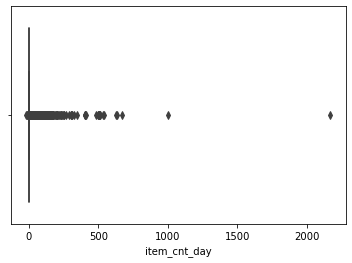

In [17]:
sns.boxplot(x=train.item_cnt_day)

In [18]:
train[(train.item_cnt_day<1001)&(train.item_cnt_day>500)]
# 이상값 확인 및 제거

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1573253,22.04.2014,15,27,8057,1200.000000,502.0
1708207,28.06.2014,17,25,20949,5.000000,501.0
2048518,02.10.2014,21,12,9242,1500.000000,512.0
2067669,09.10.2014,21,55,19437,899.000000,508.0
2326930,15.01.2015,24,12,20949,4.000000,1000.0
2608040,14.04.2015,27,12,3731,1904.548077,624.0
2626181,19.05.2015,28,12,11373,155.192950,539.0
2851073,29.09.2015,32,55,9249,1500.000000,533.0
2851091,30.09.2015,32,55,9249,1702.825746,637.0
2864235,30.09.2015,32,12,9248,1692.526158,669.0


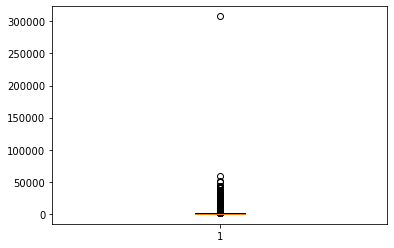

In [19]:
# 300000 이상치 발견
plt.boxplot(x=train['item_price'])
plt.show()

<AxesSubplot:xlabel='item_price'>

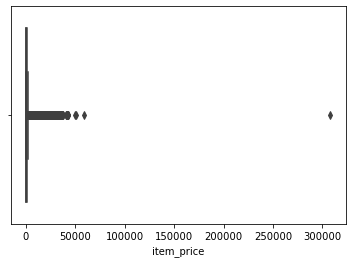

In [20]:
sns.boxplot(x=train.item_price)

In [21]:
train[(train.item_price<50000)&(train.item_price>40000)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1006638,24.10.2013,9,12,7238,42000.0,1.0
2143903,20.11.2014,22,12,14173,40900.0,1.0
2327159,29.01.2015,24,12,7241,49782.0,1.0
2885692,23.10.2015,33,42,13403,42990.0,1.0
2893100,20.10.2015,33,38,13403,41990.0,1.0
2910155,20.10.2015,33,12,13403,41990.0,1.0
2910156,29.10.2015,33,12,13403,42990.0,1.0
2913267,22.10.2015,33,18,13403,41990.0,1.0
2917760,20.10.2015,33,3,13403,42990.0,1.0
2927572,22.10.2015,33,28,13403,40991.0,1.0


In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [23]:
train['item_cnt_day'].describe()
# 요약 정보 확인

count    2.935849e+06
mean     1.242641e+00
std      2.618834e+00
min     -2.200000e+01
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      2.169000e+03
Name: item_cnt_day, dtype: float64

In [ ]:
train['item_cnt_day'].median()

In [24]:
train['item_cnt_day'].mean()

1.242640885140891

In [25]:
train['item_cnt_day'].max()

2169.0

In [26]:
train['item_cnt_day'].min()

-22.0

In [27]:
train['item_cnt_day'].std()

2.618834430899203

In [28]:
train['item_price'].describe()

count    2.935849e+06
mean     8.908532e+02
std      1.729800e+03
min     -1.000000e+00
25%      2.490000e+02
50%      3.990000e+02
75%      9.990000e+02
max      3.079800e+05
Name: item_price, dtype: float64

In [29]:
train['item_price'].mean()

890.8532326979881

In [30]:
train['item_price'].max()

307980.0

In [31]:
train['item_price'].min()

-1.0

In [32]:
train['item_price'].std()

1729.7996307129863

In [ ]:
train['item_price'].median()

In [33]:
condition1=(train['item_cnt_day']<1001)&(0<train['item_cnt_day'])

In [34]:
train=train[condition1]

In [35]:
condition=(train['item_price']<49783)&(0<train['item_price'])

In [36]:
train=train[condition]

In [37]:
train['item_price'].min() 

0.07

In [38]:
train['item_cnt_day'].min() 

1.0

In [39]:
train[train.duplicated()]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
76962,05.01.2013,0,54,20130,149.0,1.0
1435367,23.02.2014,13,50,3423,999.0,1.0
1496766,23.03.2014,14,21,3423,999.0,1.0
1671873,01.05.2014,16,50,3423,999.0,1.0
1866340,12.07.2014,18,25,3423,999.0,1.0
2198566,31.12.2014,23,42,21619,499.0,1.0


In [40]:
train.drop_duplicates(inplace=True)

In [41]:
train[train.duplicated()]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day


In [42]:
test

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


In [43]:
test[test.duplicated()]

,ID,shop_id,item_id


In [44]:
test.isna().sum()

ID         0
shop_id    0
item_id    0
dtype: int64

In [45]:
test.isnull().sum()

ID         0
shop_id    0
item_id    0
dtype: int64

In [46]:
a1=set(test['item_id'])

In [47]:
a2=set(train['item_id'])

In [48]:
len(a1)-len(a1&a2)

363

In [49]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [50]:
# !Якутск, Якутск
# 도시 이름이 사실상 같은데 ! 붙어 있다고 다르다고 표현되니 수정해서 같다고 함
# 일단 여기서는 고유 번호를 같다고 함
    
train.loc[train.shop_id == 0, 'shop_id'] = 57
test.loc[test.shop_id == 0, 'shop_id'] = 57
shops.loc[shops.shop_id==0, 'shop_id'] = 57

train.loc[train.shop_id == 1, 'shop_id'] = 58
test.loc[test.shop_id == 1, 'shop_id'] = 58
shops.loc[shops.shop_id==1, 'shop_id'] = 58

train.loc[train.shop_id == 10, 'shop_id'] = 11
test.loc[test.shop_id == 10, 'shop_id'] = 11
shops.loc[shops.shop_id==10, 'shop_id'] = 11

#이상 shop_name 변경
shops.loc[shops.shop_name == '!Якутск Орджоникидзе, 56 фран', 'shop_name'] = 'Якутск Орджоникидзе, 56'
shops.loc[shops.shop_name == '!Якутск ТЦ "Центральный" фран', 'shop_name'] = 'Якутск ТЦ "Центральный"'
shops.loc[shops.shop_name == 'Жуковский ул. Чкалова 39м?', 'shop_name'] = 'Жуковский ул. Чкалова 39м²'
shops.loc[shops.shop_name == 'Сергиев Посад ТЦ "7Я"', 'shop_name'] = 'СергиевПосад ТЦ "7Я"'



In [51]:
shops[shops.duplicated(['shop_name'])==True]

,shop_name,shop_id
11,Жуковский ул. Чкалова 39м²,11
57,"Якутск Орджоникидзе, 56",57
58,"Якутск ТЦ ""Центральный""",58


In [52]:
shops.drop_duplicates(['shop_name'])

,shop_name,shop_id
0,"Якутск Орджоникидзе, 56",57
1,"Якутск ТЦ ""Центральный""",58
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


In [53]:
shops=shops.drop_duplicates(['shop_name'])

In [54]:
shops.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  57 non-null     object
 1   shop_id    57 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


In [55]:
shops.describe()

,shop_id
count,57.000000
mean,30.859649
std,16.811389
min,2.000000
25%,17.000000
50%,31.000000
75%,45.000000
max,59.000000


In [56]:
shops[10:100]

,shop_name,shop_id
10,Жуковский ул. Чкалова 39м²,11
12,Интернет-магазин ЧС,12
13,"Казань ТЦ ""Бехетле""",13
14,"Казань ТЦ ""ПаркХаус"" II",14
15,"Калуга ТРЦ ""XXI век""",15
16,"Коломна ТЦ ""Рио""",16
17,"Красноярск ТЦ ""Взлетка Плаза""",17
18,"Красноярск ТЦ ""Июнь""",18
19,"Курск ТЦ ""Пушкинский""",19
20,"Москва ""Распродажа""",20


In [57]:
shops['city_name']=shops['shop_name'].str.split(' ').apply(lambda x: x[0])

In [58]:
cats['split_updown']=cats['item_category_name'].str.split(' - ')
cats['up']=cats['split_updown'].apply(lambda x: x[0].strip())
cats['down']=cats['split_updown'].apply(lambda x: x[1].strip() if len(x)>1 else x[0].strip())

In [59]:
# 사이킷런에 있는 LabelEncoder를 불러오며 데이터를 리스트 형태로 변수에 담는다.
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
lab.fit(list(shops['city_name'].values))
shops['city_name']=lab.transform(list(shops['city_name'].values))

In [60]:
lab.fit(list(cats['up'].values))
cats['up']=lab.transform(list(cats['up'].values))

In [61]:
lab.fit(list(cats['down'].values))
cats['down']=lab.transform(list(cats['down'].values))

In [62]:
cats[37:40]

,item_category_name,item_category_id,split_updown,up,down
37,Кино - Blu-Ray,37,"[Кино, Blu-Ray]",11,1
38,Кино - Blu-Ray 3D,38,"[Кино, Blu-Ray 3D]",11,2
39,Кино - Blu-Ray 4K,39,"[Кино, Blu-Ray 4K]",11,3


In [63]:
shops

,shop_name,shop_id,city_name
0,"Якутск Орджоникидзе, 56",57,29
1,"Якутск ТЦ ""Центральный""",58,29
2,"Адыгея ТЦ ""Мега""",2,0
3,"Балашиха ТРК ""Октябрь-Киномир""",3,1
4,"Волжский ТЦ ""Волга Молл""",4,2
5,"Вологда ТРЦ ""Мармелад""",5,3
6,"Воронеж (Плехановская, 13)",6,4
7,"Воронеж ТРЦ ""Максимир""",7,4
8,"Воронеж ТРЦ Сити-Парк ""Град""",8,4
9,Выездная Торговля,9,5


In [64]:
cats

,item_category_name,item_category_id,split_updown,up,down
0,PC - Гарнитуры/Наушники,0,"[PC, Гарнитуры/Наушники]",0,31
1,Аксессуары - PS2,1,"[Аксессуары, PS2]",1,11
2,Аксессуары - PS3,2,"[Аксессуары, PS3]",1,12
3,Аксессуары - PS4,3,"[Аксессуары, PS4]",1,13
4,Аксессуары - PSP,4,"[Аксессуары, PSP]",1,15
...,...,...,...,...,...
79,Служебные,79,[Служебные],16,56
80,Служебные - Билеты,80,"[Служебные, Билеты]",16,27
81,Чистые носители (шпиль),81,[Чистые носители (шпиль)],17,64
82,Чистые носители (штучные),82,[Чистые носители (штучные)],18,65


In [65]:
# date_block_num이 기준
# 리스트들 간의 모든 짝을 지어줌.
# 매트릭스를 일단 리스트로 설정한 후 데이터프레임으로 전환
# vstack, row_stack >> 마치 axis=0 병합 같음
from itertools import product

base=[]
col=['date_block_num','shop_id','item_id']
for i in range(34):
    condition0=train[train['date_block_num']==i]
    base.append(np.array(list(product([i],set(condition0['shop_id']),set(condition0['item_id'])))))

matrix=pd.DataFrame(np.row_stack(base), columns=col)
matrix.sort_values(col,inplace=True)

In [66]:
matrix.head(3)

,date_block_num,shop_id,item_id
0,0,2,19
1,0,2,27
2,0,2,28


In [67]:
train['profit']=train['item_price']*train['item_cnt_day']

In [68]:
train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,profit
0,02.01.2013,0,59,22154,999.00,1.0,999.00
1,03.01.2013,0,25,2552,899.00,1.0,899.00
3,06.01.2013,0,25,2554,1709.05,1.0,1709.05
4,15.01.2013,0,25,2555,1099.00,1.0,1099.00
5,10.01.2013,0,25,2564,349.00,1.0,349.00
...,...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0,299.00
2935845,09.10.2015,33,25,7460,299.00,1.0,299.00
2935846,14.10.2015,33,25,7459,349.00,1.0,349.00
2935847,22.10.2015,33,25,7440,299.00,1.0,299.00


In [69]:
month1=train.groupby(['date_block_num','shop_id','item_id']).agg({'item_cnt_day':['sum']})
month1.columns=['item_cnt_month']
month1.reset_index(inplace=True)

matrix=pd.merge(matrix, month1, on=col, how='left')
matrix['item_cnt_month']=(matrix['item_cnt_month'].fillna(0).clip(0,20).astype(np.float16))

In [70]:
test=test.set_index('ID')

In [71]:
test['date_block_num'] = 34

In [72]:
test

,shop_id,item_id,date_block_num
ID,,,
0,5,5037,34
1,5,5320,34
2,5,5233,34
3,5,5232,34
4,5,5268,34
...,...,...,...
214195,45,18454,34
214196,45,16188,34
214197,45,15757,34


In [73]:
# 매트릭스 테스트 concat 하는데 기존 인덱스 무시, 정렬 하지 않음, 
matrix= pd.concat([matrix, test],ignore_index=True, sort=False, keys=col)

In [74]:
matrix.head()

,date_block_num,shop_id,item_id,item_cnt_month
0,0,2,19,0.0
1,0,2,27,1.0
2,0,2,28,0.0
3,0,2,29,0.0
4,0,2,32,0.0


In [75]:
matrix.fillna(0, inplace=True) # item_cnt_month 값들의 일치

In [76]:
matrix

,date_block_num,shop_id,item_id,item_cnt_month
0,0,2,19,0.0
1,0,2,27,1.0
2,0,2,28,0.0
3,0,2,29,0.0
4,0,2,32,0.0
...,...,...,...,...
11098655,34,45,18454,0.0
11098656,34,45,16188,0.0
11098657,34,45,15757,0.0
11098658,34,45,19648,0.0


In [77]:
matrix=pd.merge(matrix, shops, on=['shop_id'], how='left')
matrix=pd.merge(matrix, items, on=['item_id'], how='left')
matrix=pd.merge(matrix, cats, on=['item_category_id'], how='left')

In [78]:
matrix

,date_block_num,shop_id,item_id,item_cnt_month,shop_name,city_name,item_name,item_category_id,item_category_name,split_updown,up,down
0,0,2,19,0.0,"Адыгея ТЦ ""Мега""",0,/ЗОЛОТАЯ КОЛЛЕКЦИЯ м/ф-72,40,Кино - DVD,"[Кино, DVD]",11,6
1,0,2,27,1.0,"Адыгея ТЦ ""Мега""",0,"007 Legends [PS3, русская версия]",19,Игры - PS3,"[Игры, PS3]",5,12
2,0,2,28,0.0,"Адыгея ТЦ ""Мега""",0,"007 Legends [PС, Jewel, русская версия]",30,Игры PC - Стандартные издания,"[Игры PC, Стандартные издания]",8,57
3,0,2,29,0.0,"Адыгея ТЦ ""Мега""",0,"007 Legends [Xbox 360, русская версия]",23,Игры - XBOX 360,"[Игры, XBOX 360]",5,18
4,0,2,32,0.0,"Адыгея ТЦ ""Мега""",0,1+1,40,Кино - DVD,"[Кино, DVD]",11,6
...,...,...,...,...,...,...,...,...,...,...,...,...
11098655,34,45,18454,0.0,"Самара ТЦ ""ПаркХаус""",20,СБ. Союз 55,55,Музыка - CD локального производства,"[Музыка, CD локального производства]",13,4
11098656,34,45,16188,0.0,"Самара ТЦ ""ПаркХаус""",20,Настольная игра Нано Кёрлинг,64,Подарки - Настольные игры,"[Подарки, Настольные игры]",14,44
11098657,34,45,15757,0.0,"Самара ТЦ ""ПаркХаус""",20,НОВИКОВ АЛЕКСАНДР Новая коллекция,55,Музыка - CD локального производства,"[Музыка, CD локального производства]",13,4
11098658,34,45,19648,0.0,"Самара ТЦ ""ПаркХаус""",20,ТЕРЕМ - ТЕРЕМОК сб.м/ф (Регион),40,Кино - DVD,"[Кино, DVD]",11,6


In [79]:
matrix = matrix.drop(['shop_name', 'item_name','item_category_name','split_updown'], axis=1)

In [80]:
matrix

,date_block_num,shop_id,item_id,item_cnt_month,city_name,item_category_id,up,down
0,0,2,19,0.0,0,40,11,6
1,0,2,27,1.0,0,19,5,12
2,0,2,28,0.0,0,30,8,57
3,0,2,29,0.0,0,23,5,18
4,0,2,32,0.0,0,40,11,6
...,...,...,...,...,...,...,...,...
11098655,34,45,18454,0.0,20,55,13,4
11098656,34,45,16188,0.0,20,64,14,44
11098657,34,45,15757,0.0,20,55,13,4
11098658,34,45,19648,0.0,20,40,11,6


In [81]:
def lag_feature(df, lags, cols):
    tmp = df[['date_block_num','shop_id','item_id',cols]]
    for i in lags:
        shifted = tmp.copy()
        shifted.columns = ['date_block_num','shop_id','item_id',cols+'_lag_'+str(i)]
        shifted['date_block_num'] += i
        df=pd.merge(df, shifted, on=['date_block_num','shop_id','item_id'],how='left')
    return df    

In [82]:
# 1,2,3,6,12 달 전의 item_cnt_month 값을, 현재 해당 월의 feature로 둡니다.(12 약수)
matrix=lag_feature(matrix, [1,2,3,6,12], 'item_cnt_month')

In [83]:
matrix.head()

,date_block_num,shop_id,item_id,item_cnt_month,city_name,item_category_id,up,down,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_3,item_cnt_month_lag_6,item_cnt_month_lag_12
0,0,2,19,0.0,0,40,11,6,NaN,NaN,NaN,NaN,NaN
1,0,2,27,1.0,0,19,5,12,NaN,NaN,NaN,NaN,NaN
2,0,2,28,0.0,0,30,8,57,NaN,NaN,NaN,NaN,NaN
3,0,2,29,0.0,0,23,5,18,NaN,NaN,NaN,NaN,NaN
4,0,2,32,0.0,0,40,11,6,NaN,NaN,NaN,NaN,NaN


In [84]:
# 이상치를 제거해놨기 때문에 대표성을 띄는 mean 사용해도 괜찮, 대표성 가짐, mean을 활용
# 대표성을 띄는 평균을 활용하여 원활환 비교 분석에 활용. lag 함수의 시계열 변화를 관찰, 분석하겠다. 
# 추세 분석에 활용한다던지
# 시계열 추세 분석에 활용하기 위해 위의 변수들에 lag 함수를 적용하겠음.
# date_block_num,shop_id,item_id 가장 중요한 이 3 가지(key)를 우선적으로 활용 이게 결국 최종적으로 구하고자하는
# (월,상점,상품)의 세일즈이기 때문.

In [85]:
# 월 평균 판매 수량
group=matrix.groupby(['date_block_num']).agg({'item_cnt_month':['mean']})
group.columns=['date_avg_item_cnt']
group.reset_index(inplace=True)

matrix=pd.merge(matrix,group,on=['date_block_num'],how='left')
matrix=lag_feature(matrix, [1], 'date_avg_item_cnt')
matrix.drop(['date_avg_item_cnt'],axis=1,inplace=True)

In [86]:
# 월별 + item별 평균 판매 수량
group = matrix.groupby(['date_block_num', 'item_id']).agg({'item_cnt_month': ['mean']})
group.columns = [ 'date_item_avg_item_cnt' ]
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num','item_id'], how='left')
matrix['date_item_avg_item_cnt'] = matrix['date_item_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1,2,3,6,12], 'date_item_avg_item_cnt')
matrix.drop(['date_item_avg_item_cnt'], axis=1, inplace=True)

In [87]:
# 월별 + shop별 평균 판매 수량
group = matrix.groupby(['date_block_num', 'shop_id']).agg({'item_cnt_month': ['mean']})
group.columns = [ 'date_shop_avg_item_cnt' ]
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num','shop_id'], how='left')
matrix['date_shop_avg_item_cnt'] = matrix['date_shop_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1,2,3,6,12], 'date_shop_avg_item_cnt')
matrix.drop(['date_shop_avg_item_cnt'], axis=1, inplace=True)

In [88]:
group = matrix.groupby(['date_block_num', 'item_category_id']).agg({'item_cnt_month': ['mean']})
group.columns = [ 'date_cat_avg_item_cnt' ]
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num','item_category_id'], how='left')
matrix['date_cat_avg_item_cnt'] = matrix['date_cat_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1], 'date_cat_avg_item_cnt')
matrix.drop(['date_cat_avg_item_cnt'], axis=1, inplace=True)

In [89]:
group = matrix.groupby(['date_block_num', 'shop_id', 'item_category_id']).agg({'item_cnt_month': ['mean']})
group.columns = ['date_shop_cat_avg_item_cnt']
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num', 'shop_id', 'item_category_id'], how='left')
matrix['date_shop_cat_avg_item_cnt'] = matrix['date_shop_cat_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1], 'date_shop_cat_avg_item_cnt')
matrix.drop(['date_shop_cat_avg_item_cnt'], axis=1, inplace=True)

In [90]:
group = matrix.groupby(['date_block_num', 'shop_id', 'up']).agg({'item_cnt_month': ['mean']})
group.columns = ['date_shop_type_avg_item_cnt']
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num', 'shop_id', 'up'], how='left')
matrix['date_shop_type_avg_item_cnt'] = matrix['date_shop_type_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1], 'date_shop_type_avg_item_cnt')
matrix.drop(['date_shop_type_avg_item_cnt'], axis=1, inplace=True)

In [91]:
group = matrix.groupby(['date_block_num', 'shop_id', 'down']).agg({'item_cnt_month': ['mean']})
group.columns = ['date_shop_subtype_avg_item_cnt']
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num', 'shop_id', 'down'], how='left')
matrix['date_shop_subtype_avg_item_cnt'] = matrix['date_shop_subtype_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1], 'date_shop_subtype_avg_item_cnt')
matrix.drop(['date_shop_subtype_avg_item_cnt'], axis=1, inplace=True)

In [92]:
group = matrix.groupby(['date_block_num', 'city_name']).agg({'item_cnt_month': ['mean']})
group.columns = [ 'date_city_avg_item_cnt' ]
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num', 'city_name'], how='left')
matrix['date_city_avg_item_cnt'] = matrix['date_city_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1], 'date_city_avg_item_cnt')
matrix.drop(['date_city_avg_item_cnt'], axis=1, inplace=True)

In [93]:
group = matrix.groupby(['date_block_num', 'item_id', 'city_name']).agg({'item_cnt_month': ['mean']})
group.columns = [ 'date_item_city_avg_item_cnt' ]
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num', 'item_id', 'city_name'], how='left')
matrix['date_item_city_avg_item_cnt'] = matrix['date_item_city_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1], 'date_item_city_avg_item_cnt')
matrix.drop(['date_item_city_avg_item_cnt'], axis=1, inplace=True)

In [94]:
group = matrix.groupby(['date_block_num', 'up']).agg({'item_cnt_month': ['mean']})
group.columns = [ 'date_type_avg_item_cnt' ]
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num', 'up'], how='left')
matrix['date_type_avg_item_cnt'] = matrix['date_type_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1], 'date_type_avg_item_cnt')
matrix.drop(['date_type_avg_item_cnt'], axis=1, inplace=True)

In [95]:
group = matrix.groupby(['date_block_num', 'down']).agg({'item_cnt_month': ['mean']})
group.columns = [ 'date_subtype_avg_item_cnt' ]
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num', 'down'], how='left')
matrix['date_subtype_avg_item_cnt'] = matrix['date_subtype_avg_item_cnt'].astype(np.float16)
matrix = lag_feature(matrix, [1], 'date_subtype_avg_item_cnt')
matrix.drop(['date_subtype_avg_item_cnt'], axis=1, inplace=True)

In [96]:
# 추세 분석 threshold 평균 (주식분석 이동평균선 추세분석 참고 : 가격(price) 기준)
# nan 값의 경우 이전 달(최대 lag=3)의 변수 값을 활용 
# (시계축을 유지하며 과거 데이터를 누적 반영하는 시계열의 특성을 반영) 
# 이전 데이터를 활용하는 ffill 같은 느낌.

In [97]:
# 전 기간동안의 각각 상품의 평균 가격. (상품) 단위.
group = train.groupby(['item_id']).agg({'item_price': ['mean']})
group.columns = ['item_avg_item_price']
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['item_id'], how='left')
matrix['item_avg_item_price'] = matrix['item_avg_item_price'].astype(np.float16)

# 월별 상품 평균 가격. (월, 상품) 단위.
group = train.groupby(['date_block_num','item_id']).agg({'item_price': ['mean']})
group.columns = ['date_item_avg_item_price']
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num','item_id'], how='left')
matrix['date_item_avg_item_price'] = matrix['date_item_avg_item_price'].astype(np.float16)

# 월별, 각 1~6개월 전의 평균 가격 (월, 상품) 단위.
lags = [1,2,3,4,5,6]
matrix = lag_feature(matrix, lags, 'date_item_avg_item_price')

# 월별, 각 1~6개월 전의 평균 가격과 전 기간 평균 가격과의 차이. (월, 상품) 단위.
# 전 구간 가격 평균하고 1~6달 가격을 비교함으로써, 지난 1~6달간의 가격 트랜드를 알 수 있음.
for i in lags:
    matrix['delta_price_lag_'+str(i)] = \
        (matrix['date_item_avg_item_price_lag_'+str(i)] - matrix['item_avg_item_price']) / matrix['item_avg_item_price']

# 현재 달 기준, 지난 1~6달 중, 최근의 트랜드를 찾음.
# 가장 최근 1달 전이 좋지만, 없을 경우 최대 6달 전까지 찾는 것.
def select_trend(row):
    for i in lags:
        if row['delta_price_lag_'+str(i)]:
            return row['delta_price_lag_'+str(i)]
    return 0

matrix['delta_price_lag'] = matrix.apply(select_trend, axis=1)
matrix['delta_price_lag'] = matrix['delta_price_lag'].astype(np.float16)
matrix['delta_price_lag'].fillna(0, inplace=True)

# feature drop 하기
# 가장 최근 price trend 를 찾았으니, 가격과 관련된 이전 lags 들은 필요 없음.
fetures_to_drop = ['item_avg_item_price', 'date_item_avg_item_price']
for i in lags:
    fetures_to_drop += ['date_item_avg_item_price_lag_'+str(i)]
    fetures_to_drop += ['delta_price_lag_'+str(i)]

matrix.drop(fetures_to_drop, axis=1, inplace=True)

In [98]:
# 가격 트랜드와 동일하게, 총 수입 트랜드도 잡아봄.
# 가격 트랜드 방법과 똑같음.

In [99]:
# 월별 각각의 상점 총 매출. (월, 상점) 단위.
group = train.groupby(['date_block_num','shop_id']).agg({'profit': ['sum']})
group.columns = ['date_shop_revenue']
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['date_block_num','shop_id'], how='left')
matrix['date_shop_revenue'] = matrix['date_shop_revenue'].astype(np.float32)

# 전 기간동안, 각각의 상점 매출 평균. (상점) 단위.
group = group.groupby(['shop_id']).agg({'date_shop_revenue': ['mean']})
group.columns = ['shop_avg_revenue']
group.reset_index(inplace=True)

matrix = pd.merge(matrix, group, on=['shop_id'], how='left')
matrix['shop_avg_revenue'] = matrix['shop_avg_revenue'].astype(np.float32)

lags = [1,2,3,4,5,6]
matrix = lag_feature(matrix, lags, 'date_shop_revenue')

# 월별, 각 1~6개월 전의 평균 가격과 전 기간 평균 가격과의 차이. (월, 상품) 단위.
# 전 구간 가격 평균하고 1~6달 가격을 비교함으로써, 지난 1~6달간의 가격 트랜드를 알 수 있음.
for i in lags:
    matrix['delta_revenue_lag_'+str(i)] = \
        (matrix['date_shop_revenue_lag_'+str(i)] - matrix['shop_avg_revenue']) / matrix['shop_avg_revenue']

# 현재 달 기준, 지난 1~6달 중, 최근의 트랜드를 찾음.
# 가장 최근 1달 전이 좋지만, 없을 경우 최대 6달 전까지 찾는 것.
def select_trend_(row):
    for i in lags:
        if row['delta_revenue_lag_'+str(i)]:
            return row['delta_revenue_lag_'+str(i)]
    return 0

matrix['delta_revenue_lag'] = matrix.apply(select_trend_, axis=1)
matrix['delta_revenue_lag'] = matrix['delta_revenue_lag'].astype(np.float16)
matrix['delta_revenue_lag'].fillna(0, inplace=True)

# feature drop 하기
# 가장 최근 price trend 를 찾았으니, 가격과 관련된 이전 lags 들은 필요 없음.
features_to_drop = ['shop_avg_revenue', 'date_shop_revenue']
for i in lags:
    features_to_drop += ['date_shop_revenue_lag_'+str(i)]
    features_to_drop += ['delta_revenue_lag_'+str(i)]

matrix.drop(features_to_drop, axis=1, inplace=True)

In [101]:
matrix['month'] = matrix['date_block_num'] % 12

days = pd.Series([31,28,31,30,31,30,31,31,30,31,30,31])
matrix['days'] = matrix['month'].map(days).astype(np.int8)

In [102]:
cache = {}
matrix['item_shop_last_sale'] = -1
matrix['item_shop_last_sale'] = matrix['item_shop_last_sale'].astype(np.int8)

# (상점, 상품)단위로, 해당 상품이 해당 월 기준, 몇 달전에 마지막으로 팔렸는지, item_shop_last_sale 에 저장.
# 예를 들어 1달 전에 팔렸으면 1임.
for idx, row in matrix.iterrows(): 
    key = str(row.item_id)+' '+str(row.shop_id)
    if key not in cache:
        if row.item_cnt_month != 0:
            cache[key] = row.date_block_num
    else:
        last_date_block_num = cache[key]
        matrix.at[idx, 'item_shop_last_sale'] = row.date_block_num - last_date_block_num
        cache[key] = row.date_block_num   

In [103]:
cache = {}
matrix['item_last_sale'] = -1
matrix['item_last_sale'] = matrix['item_last_sale'].astype(np.int8)

# (상품) 단위로, 해당 상품이 해당 월 기준, 몇 달전에 마지막으로 팔렸는지, item_last_sale 에 저장.
for idx, row in matrix.iterrows():    
    key = row.item_id
    if key not in cache:
        if row.item_cnt_month != 0:
            cache[key] = row.date_block_num
    else:
        last_date_block_num = cache[key]
        if row.date_block_num > last_date_block_num:
            matrix.at[idx, 'item_last_sale'] = row.date_block_num - last_date_block_num
            cache[key] = row.date_block_num 

In [104]:
matrix['item_shop_first_sale'] = matrix['date_block_num'] - matrix.groupby(['item_id','shop_id'])['date_block_num'].transform('min')
matrix['item_first_sale'] = matrix['date_block_num'] - matrix.groupby('item_id')['date_block_num'].transform('min')

In [105]:
matrix = matrix[matrix.date_block_num > 11]

In [106]:
def fill_na(df):
    for col in df.columns:
        if ('_lag_' in col) & (df[col].isnull().any()):
            if ('item_cnt' in col):
                df[col].fillna(0, inplace=True)         
    return df

matrix = fill_na(matrix)

In [107]:
import time
import sys
import gc
import pickle
matrix.to_pickle('data.pkl')
del matrix
del cache
del group
del items
del shops
del cats
del train
# leave test for submission
gc.collect();

In [108]:
data = pd.read_pickle('data.pkl')

In [109]:
X_train = data[data.date_block_num < 33].drop(['item_cnt_month'], axis=1)
Y_train = data[data.date_block_num < 33]['item_cnt_month']
X_valid = data[data.date_block_num == 33].drop(['item_cnt_month'], axis=1)
Y_valid = data[data.date_block_num == 33]['item_cnt_month']
X_test = data[data.date_block_num == 34].drop(['item_cnt_month'], axis=1)

In [110]:
del data
gc.collect();

In [111]:
!pip install xgboost

In [112]:
from xgboost import XGBRegressor
from xgboost import plot_importance

def plot_features(booster, figsize):    
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax)

In [113]:
model = XGBRegressor(max_depth=8, 
                         n_estimators=500, 
                         min_child_weight=1000,  
                         colsample_bytree=0.7, 
                         subsample=0.8, 
                         eta=0.3, 
                         seed=0)

model.fit(
    X_train, 
    Y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, Y_train), (X_valid, Y_valid)], 
    verbose=True, 
    early_stopping_rounds=40)

C:\Users\LG\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\LG\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:1.05505	validation_1-rmse:1.04298
[1]	validation_0-rmse:0.96871	validation_1-rmse:0.97964
[2]	validation_0-rmse:0.91878	validation_1-rmse:0.94760
[3]	validation_0-rmse:0.89021	validation_1-rmse:0.93344
[4]	validation_0-rmse:0.87454	validation_1-rmse:0.92629
[5]	validation_0-rmse:0.86316	validation_1-rmse:0.92188
[6]	validation_0-rmse:0.85545	validation_1-rmse:0.91900
[7]	validation_0-rmse:0.84963	validation_1-rmse:0.91683
[8]	validation_0-rmse:0.84529	validation_1-rmse:0.91670
[9]	validation_0-rmse:0.84235	validation_1-rmse:0.91753
[10]	validation_0-rmse:0.84051	validation_1-rmse:0.91740
[11]	validation_0-rmse:0.83830	validation_1-rmse:0.91623
[12]	validation_0-rmse:0.83658	validation_1-rmse:0.91430
[13]	validation_0-rmse:0.83480	validation_1-rmse:0.91444
[14]	validation_0-rmse:0.83330	validation_1-rmse:0.91423
[15]	validation_0-rmse:0.83194	validation_1-rmse:0.91687
[16]	validation_0-rmse:0.83063	validation_1-rmse:0.91659
[17]	validation_0-rmse:0.82980	validation

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False, eta=0.3,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=1000,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0, ...)

In [116]:
xgb_val_pred = model.predict(X_valid)
xgb_test_pred = model.predict(X_test)

pickle.dump(xgb_val_pred, open('xgb_train.pickle', 'wb'))
pickle.dump(xgb_test_pred, open('xgb_test.pickle', 'wb'))

In [140]:
X_train.isnull().sum()

date_block_num                          0
shop_id                                 0
item_id                                 0
city_name                               0
item_category_id                        0
up                                      0
down                                    0
item_cnt_month_lag_1                    0
item_cnt_month_lag_2                    0
item_cnt_month_lag_3                    0
item_cnt_month_lag_6                    0
item_cnt_month_lag_12                   0
date_avg_item_cnt_lag_1                 0
date_item_avg_item_cnt_lag_1            0
date_item_avg_item_cnt_lag_2            0
date_item_avg_item_cnt_lag_3            0
date_item_avg_item_cnt_lag_6            0
date_item_avg_item_cnt_lag_12           0
date_shop_avg_item_cnt_lag_1            0
date_shop_avg_item_cnt_lag_2            0
date_shop_avg_item_cnt_lag_3            0
date_shop_avg_item_cnt_lag_6            0
date_shop_avg_item_cnt_lag_12           0
date_cat_avg_item_cnt_lag_1       

In [141]:
X_test.isnull().sum()

date_block_num                          0
shop_id                                 0
item_id                                 0
city_name                               0
item_category_id                        0
up                                      0
down                                    0
item_cnt_month_lag_1                    0
item_cnt_month_lag_2                    0
item_cnt_month_lag_3                    0
item_cnt_month_lag_6                    0
item_cnt_month_lag_12                   0
date_avg_item_cnt_lag_1                 0
date_item_avg_item_cnt_lag_1            0
date_item_avg_item_cnt_lag_2            0
date_item_avg_item_cnt_lag_3            0
date_item_avg_item_cnt_lag_6            0
date_item_avg_item_cnt_lag_12           0
date_shop_avg_item_cnt_lag_1            0
date_shop_avg_item_cnt_lag_2            0
date_shop_avg_item_cnt_lag_3            0
date_shop_avg_item_cnt_lag_6            0
date_shop_avg_item_cnt_lag_12           0
date_cat_avg_item_cnt_lag_1       

In [142]:
X_valid.isnull().sum()

date_block_num                          0
shop_id                                 0
item_id                                 0
city_name                               0
item_category_id                        0
up                                      0
down                                    0
item_cnt_month_lag_1                    0
item_cnt_month_lag_2                    0
item_cnt_month_lag_3                    0
item_cnt_month_lag_6                    0
item_cnt_month_lag_12                   0
date_avg_item_cnt_lag_1                 0
date_item_avg_item_cnt_lag_1            0
date_item_avg_item_cnt_lag_2            0
date_item_avg_item_cnt_lag_3            0
date_item_avg_item_cnt_lag_6            0
date_item_avg_item_cnt_lag_12           0
date_shop_avg_item_cnt_lag_1            0
date_shop_avg_item_cnt_lag_2            0
date_shop_avg_item_cnt_lag_3            0
date_shop_avg_item_cnt_lag_6            0
date_shop_avg_item_cnt_lag_12           0
date_cat_avg_item_cnt_lag_1       

In [143]:
# train-test data scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)      # train data scale 정보 저장

X_train_scaled = sc.transform(X_train)  # train data scale
X_valid_scaled = sc.transform(X_valid)    # test data scale
X_test_scaled=sc.transform(X_test)

In [144]:
from sklearn.decomposition import PCA
pca = PCA(n_components=12).fit(X_train_scaled) # train data로 PCA
X_train_pca = pca.transform(X_train_scaled)
X_valid_pca = pca.transform(X_valid_scaled)
X_test_pca=pca.transform(X_test_scaled)

In [145]:
rf_model = RandomForestRegressor(n_estimators=50, max_depth=7, random_state=0, n_jobs=-1)
rf_model.fit(X_train_pca, Y_train)

RandomForestRegressor(max_depth=7, n_estimators=50, n_jobs=-1, random_state=0)

In [146]:
rf_train_pred = rf_model.predict(X_train_pca)
rf_val_pred = rf_model.predict(X_valid_pca)
rf_test_pred = rf_model.predict(X_test_pca)

In [150]:
# cat_features = [0, 1, 7, 8]
# 과적합 발생해서 iteration 500 -> 1000
catboost_model = CatBoostRegressor(    max_depth=10, 
    loss_function='RMSE',
    n_estimators = 1000,
    eta = 0.3,
    random_seed=123 )
# catboost_model = CatBoostRegressor()
catboost_model.fit(
    X_train_pca, Y_train,
    eval_set=(X_valid_pca, Y_valid),
    verbose=True,
)

Learning rate set to 0.200421
0:	learn: 1.1221217	test: 1.0902076	best: 1.0902076 (0)	total: 632ms	remaining: 10m 31s
1:	learn: 1.0730047	test: 1.0555267	best: 1.0555267 (1)	total: 1.11s	remaining: 9m 14s
2:	learn: 1.0369839	test: 1.0309657	best: 1.0309657 (2)	total: 1.62s	remaining: 8m 59s
3:	learn: 1.0121825	test: 1.0154619	best: 1.0154619 (3)	total: 2.06s	remaining: 8m 34s
4:	learn: 0.9937632	test: 1.0048062	best: 1.0048062 (4)	total: 2.51s	remaining: 8m 19s
5:	learn: 0.9794044	test: 0.9953128	best: 0.9953128 (5)	total: 2.95s	remaining: 8m 8s
6:	learn: 0.9693994	test: 0.9872077	best: 0.9872077 (6)	total: 3.43s	remaining: 8m 7s
7:	learn: 0.9614648	test: 0.9825576	best: 0.9825576 (7)	total: 3.96s	remaining: 8m 10s
8:	learn: 0.9551756	test: 0.9778175	best: 0.9778175 (8)	total: 4.36s	remaining: 7m 59s
9:	learn: 0.9498166	test: 0.9740494	best: 0.9740494 (9)	total: 4.86s	remaining: 8m 1s
10:	learn: 0.9457751	test: 0.9719661	best: 0.9719661 (10)	total: 5.28s	remaining: 7m 54s
11:	learn: 0.

93:	learn: 0.8954345	test: 0.9534813	best: 0.9534813 (93)	total: 42.2s	remaining: 6m 46s
94:	learn: 0.8953118	test: 0.9536464	best: 0.9534813 (93)	total: 42.7s	remaining: 6m 46s
95:	learn: 0.8952257	test: 0.9538138	best: 0.9534813 (93)	total: 43.1s	remaining: 6m 46s
96:	learn: 0.8950366	test: 0.9537494	best: 0.9534813 (93)	total: 43.6s	remaining: 6m 45s
97:	learn: 0.8948413	test: 0.9537874	best: 0.9534813 (93)	total: 44s	remaining: 6m 44s
98:	learn: 0.8946485	test: 0.9536955	best: 0.9534813 (93)	total: 44.4s	remaining: 6m 44s
99:	learn: 0.8944631	test: 0.9537331	best: 0.9534813 (93)	total: 44.9s	remaining: 6m 44s
100:	learn: 0.8938582	test: 0.9536772	best: 0.9534813 (93)	total: 45.4s	remaining: 6m 44s
101:	learn: 0.8936256	test: 0.9537802	best: 0.9534813 (93)	total: 45.8s	remaining: 6m 43s
102:	learn: 0.8927800	test: 0.9538494	best: 0.9534813 (93)	total: 46.4s	remaining: 6m 43s
103:	learn: 0.8925624	test: 0.9538172	best: 0.9534813 (93)	total: 46.9s	remaining: 6m 43s
104:	learn: 0.89239

185:	learn: 0.8796381	test: 0.9571757	best: 0.9534813 (93)	total: 1m 22s	remaining: 6m 2s
186:	learn: 0.8795712	test: 0.9572971	best: 0.9534813 (93)	total: 1m 23s	remaining: 6m 1s
187:	learn: 0.8794814	test: 0.9572958	best: 0.9534813 (93)	total: 1m 23s	remaining: 6m 1s
188:	learn: 0.8793693	test: 0.9571404	best: 0.9534813 (93)	total: 1m 24s	remaining: 6m
189:	learn: 0.8792903	test: 0.9572029	best: 0.9534813 (93)	total: 1m 24s	remaining: 6m
190:	learn: 0.8789883	test: 0.9580012	best: 0.9534813 (93)	total: 1m 24s	remaining: 6m
191:	learn: 0.8788848	test: 0.9580999	best: 0.9534813 (93)	total: 1m 25s	remaining: 5m 59s
192:	learn: 0.8788255	test: 0.9581406	best: 0.9534813 (93)	total: 1m 25s	remaining: 5m 58s
193:	learn: 0.8787558	test: 0.9581185	best: 0.9534813 (93)	total: 1m 26s	remaining: 5m 58s
194:	learn: 0.8786802	test: 0.9582678	best: 0.9534813 (93)	total: 1m 26s	remaining: 5m 57s
195:	learn: 0.8785924	test: 0.9586131	best: 0.9534813 (93)	total: 1m 27s	remaining: 5m 57s
196:	learn: 0.

276:	learn: 0.8716734	test: 0.9595748	best: 0.9534813 (93)	total: 2m 3s	remaining: 5m 21s
277:	learn: 0.8716016	test: 0.9595345	best: 0.9534813 (93)	total: 2m 3s	remaining: 5m 21s
278:	learn: 0.8715573	test: 0.9595858	best: 0.9534813 (93)	total: 2m 4s	remaining: 5m 21s
279:	learn: 0.8715105	test: 0.9595457	best: 0.9534813 (93)	total: 2m 4s	remaining: 5m 20s
280:	learn: 0.8714595	test: 0.9595059	best: 0.9534813 (93)	total: 2m 5s	remaining: 5m 19s
281:	learn: 0.8714352	test: 0.9594936	best: 0.9534813 (93)	total: 2m 5s	remaining: 5m 19s
282:	learn: 0.8713790	test: 0.9594658	best: 0.9534813 (93)	total: 2m 5s	remaining: 5m 18s
283:	learn: 0.8712805	test: 0.9595334	best: 0.9534813 (93)	total: 2m 6s	remaining: 5m 18s
284:	learn: 0.8712061	test: 0.9595172	best: 0.9534813 (93)	total: 2m 6s	remaining: 5m 18s
285:	learn: 0.8711632	test: 0.9595313	best: 0.9534813 (93)	total: 2m 7s	remaining: 5m 17s
286:	learn: 0.8711108	test: 0.9595133	best: 0.9534813 (93)	total: 2m 7s	remaining: 5m 17s
287:	learn

367:	learn: 0.8646313	test: 0.9604547	best: 0.9534813 (93)	total: 2m 43s	remaining: 4m 40s
368:	learn: 0.8645859	test: 0.9604853	best: 0.9534813 (93)	total: 2m 44s	remaining: 4m 40s
369:	learn: 0.8645413	test: 0.9605054	best: 0.9534813 (93)	total: 2m 44s	remaining: 4m 40s
370:	learn: 0.8644433	test: 0.9605294	best: 0.9534813 (93)	total: 2m 44s	remaining: 4m 39s
371:	learn: 0.8644063	test: 0.9605906	best: 0.9534813 (93)	total: 2m 45s	remaining: 4m 39s
372:	learn: 0.8642731	test: 0.9606907	best: 0.9534813 (93)	total: 2m 45s	remaining: 4m 38s
373:	learn: 0.8641995	test: 0.9606929	best: 0.9534813 (93)	total: 2m 46s	remaining: 4m 38s
374:	learn: 0.8641781	test: 0.9608163	best: 0.9534813 (93)	total: 2m 46s	remaining: 4m 37s
375:	learn: 0.8640457	test: 0.9608275	best: 0.9534813 (93)	total: 2m 47s	remaining: 4m 37s
376:	learn: 0.8639839	test: 0.9608877	best: 0.9534813 (93)	total: 2m 47s	remaining: 4m 36s
377:	learn: 0.8638931	test: 0.9608280	best: 0.9534813 (93)	total: 2m 48s	remaining: 4m 36s

458:	learn: 0.8588684	test: 0.9623993	best: 0.9534813 (93)	total: 3m 22s	remaining: 3m 58s
459:	learn: 0.8588456	test: 0.9624161	best: 0.9534813 (93)	total: 3m 23s	remaining: 3m 58s
460:	learn: 0.8587270	test: 0.9623443	best: 0.9534813 (93)	total: 3m 23s	remaining: 3m 58s
461:	learn: 0.8586468	test: 0.9623762	best: 0.9534813 (93)	total: 3m 24s	remaining: 3m 57s
462:	learn: 0.8586004	test: 0.9623871	best: 0.9534813 (93)	total: 3m 24s	remaining: 3m 57s
463:	learn: 0.8585004	test: 0.9625721	best: 0.9534813 (93)	total: 3m 24s	remaining: 3m 56s
464:	learn: 0.8584710	test: 0.9625777	best: 0.9534813 (93)	total: 3m 25s	remaining: 3m 56s
465:	learn: 0.8584399	test: 0.9626261	best: 0.9534813 (93)	total: 3m 25s	remaining: 3m 55s
466:	learn: 0.8583750	test: 0.9626431	best: 0.9534813 (93)	total: 3m 26s	remaining: 3m 55s
467:	learn: 0.8582272	test: 0.9626504	best: 0.9534813 (93)	total: 3m 26s	remaining: 3m 54s
468:	learn: 0.8581914	test: 0.9625911	best: 0.9534813 (93)	total: 3m 27s	remaining: 3m 54s

549:	learn: 0.8536930	test: 0.9626243	best: 0.9534813 (93)	total: 4m 1s	remaining: 3m 17s
550:	learn: 0.8536562	test: 0.9626275	best: 0.9534813 (93)	total: 4m 2s	remaining: 3m 17s
551:	learn: 0.8536152	test: 0.9628216	best: 0.9534813 (93)	total: 4m 2s	remaining: 3m 16s
552:	learn: 0.8535919	test: 0.9628735	best: 0.9534813 (93)	total: 4m 2s	remaining: 3m 16s
553:	learn: 0.8535483	test: 0.9628111	best: 0.9534813 (93)	total: 4m 3s	remaining: 3m 15s
554:	learn: 0.8535275	test: 0.9628246	best: 0.9534813 (93)	total: 4m 3s	remaining: 3m 15s
555:	learn: 0.8535008	test: 0.9629310	best: 0.9534813 (93)	total: 4m 4s	remaining: 3m 15s
556:	learn: 0.8534622	test: 0.9629242	best: 0.9534813 (93)	total: 4m 4s	remaining: 3m 14s
557:	learn: 0.8534390	test: 0.9629538	best: 0.9534813 (93)	total: 4m 5s	remaining: 3m 14s
558:	learn: 0.8534029	test: 0.9629261	best: 0.9534813 (93)	total: 4m 5s	remaining: 3m 13s
559:	learn: 0.8533637	test: 0.9629264	best: 0.9534813 (93)	total: 4m 5s	remaining: 3m 13s
560:	learn

640:	learn: 0.8500388	test: 0.9651370	best: 0.9534813 (93)	total: 4m 40s	remaining: 2m 37s
641:	learn: 0.8500041	test: 0.9651611	best: 0.9534813 (93)	total: 4m 41s	remaining: 2m 36s
642:	learn: 0.8499807	test: 0.9651995	best: 0.9534813 (93)	total: 4m 41s	remaining: 2m 36s
643:	learn: 0.8499233	test: 0.9652302	best: 0.9534813 (93)	total: 4m 42s	remaining: 2m 35s
644:	learn: 0.8498965	test: 0.9652906	best: 0.9534813 (93)	total: 4m 42s	remaining: 2m 35s
645:	learn: 0.8498580	test: 0.9652278	best: 0.9534813 (93)	total: 4m 42s	remaining: 2m 34s
646:	learn: 0.8498395	test: 0.9652512	best: 0.9534813 (93)	total: 4m 43s	remaining: 2m 34s
647:	learn: 0.8497442	test: 0.9653382	best: 0.9534813 (93)	total: 4m 43s	remaining: 2m 34s
648:	learn: 0.8496785	test: 0.9653601	best: 0.9534813 (93)	total: 4m 44s	remaining: 2m 33s
649:	learn: 0.8496515	test: 0.9653557	best: 0.9534813 (93)	total: 4m 44s	remaining: 2m 33s
650:	learn: 0.8496184	test: 0.9653551	best: 0.9534813 (93)	total: 4m 45s	remaining: 2m 32s

731:	learn: 0.8463158	test: 0.9696316	best: 0.9534813 (93)	total: 5m 19s	remaining: 1m 57s
732:	learn: 0.8462740	test: 0.9695344	best: 0.9534813 (93)	total: 5m 20s	remaining: 1m 56s
733:	learn: 0.8462476	test: 0.9695805	best: 0.9534813 (93)	total: 5m 20s	remaining: 1m 56s
734:	learn: 0.8462292	test: 0.9696084	best: 0.9534813 (93)	total: 5m 21s	remaining: 1m 55s
735:	learn: 0.8461598	test: 0.9696206	best: 0.9534813 (93)	total: 5m 21s	remaining: 1m 55s
736:	learn: 0.8461355	test: 0.9696071	best: 0.9534813 (93)	total: 5m 22s	remaining: 1m 54s
737:	learn: 0.8461085	test: 0.9696149	best: 0.9534813 (93)	total: 5m 22s	remaining: 1m 54s
738:	learn: 0.8460953	test: 0.9695498	best: 0.9534813 (93)	total: 5m 22s	remaining: 1m 54s
739:	learn: 0.8460361	test: 0.9695273	best: 0.9534813 (93)	total: 5m 23s	remaining: 1m 53s
740:	learn: 0.8460036	test: 0.9696242	best: 0.9534813 (93)	total: 5m 23s	remaining: 1m 53s
741:	learn: 0.8459723	test: 0.9695999	best: 0.9534813 (93)	total: 5m 24s	remaining: 1m 52s

822:	learn: 0.8429087	test: 0.9749331	best: 0.9534813 (93)	total: 5m 59s	remaining: 1m 17s
823:	learn: 0.8428747	test: 0.9749157	best: 0.9534813 (93)	total: 5m 59s	remaining: 1m 16s
824:	learn: 0.8428476	test: 0.9749351	best: 0.9534813 (93)	total: 5m 59s	remaining: 1m 16s
825:	learn: 0.8428129	test: 0.9748686	best: 0.9534813 (93)	total: 6m	remaining: 1m 15s
826:	learn: 0.8427797	test: 0.9749561	best: 0.9534813 (93)	total: 6m	remaining: 1m 15s
827:	learn: 0.8427360	test: 0.9749791	best: 0.9534813 (93)	total: 6m 1s	remaining: 1m 15s
828:	learn: 0.8426892	test: 0.9751912	best: 0.9534813 (93)	total: 6m 1s	remaining: 1m 14s
829:	learn: 0.8426537	test: 0.9752051	best: 0.9534813 (93)	total: 6m 2s	remaining: 1m 14s
830:	learn: 0.8426169	test: 0.9752904	best: 0.9534813 (93)	total: 6m 2s	remaining: 1m 13s
831:	learn: 0.8425691	test: 0.9753385	best: 0.9534813 (93)	total: 6m 2s	remaining: 1m 13s
832:	learn: 0.8425418	test: 0.9753345	best: 0.9534813 (93)	total: 6m 3s	remaining: 1m 12s
833:	learn: 0

914:	learn: 0.8393967	test: 0.9753266	best: 0.9534813 (93)	total: 6m 38s	remaining: 37s
915:	learn: 0.8393699	test: 0.9753435	best: 0.9534813 (93)	total: 6m 38s	remaining: 36.6s
916:	learn: 0.8393455	test: 0.9753245	best: 0.9534813 (93)	total: 6m 39s	remaining: 36.1s
917:	learn: 0.8393100	test: 0.9756380	best: 0.9534813 (93)	total: 6m 39s	remaining: 35.7s
918:	learn: 0.8392766	test: 0.9756821	best: 0.9534813 (93)	total: 6m 39s	remaining: 35.2s
919:	learn: 0.8392348	test: 0.9756990	best: 0.9534813 (93)	total: 6m 40s	remaining: 34.8s
920:	learn: 0.8392135	test: 0.9757664	best: 0.9534813 (93)	total: 6m 40s	remaining: 34.3s
921:	learn: 0.8391748	test: 0.9757419	best: 0.9534813 (93)	total: 6m 40s	remaining: 33.9s
922:	learn: 0.8391481	test: 0.9757280	best: 0.9534813 (93)	total: 6m 41s	remaining: 33.5s
923:	learn: 0.8391116	test: 0.9758134	best: 0.9534813 (93)	total: 6m 41s	remaining: 33s
924:	learn: 0.8390844	test: 0.9758050	best: 0.9534813 (93)	total: 6m 41s	remaining: 32.6s
925:	learn: 0.

In [151]:
catboost_train_pred = catboost_model.predict(X_train_pca)
catboost_val_pred = catboost_model.predict(X_valid_pca)
catboost_test_pred = catboost_model.predict(X_test_pca)

In [152]:
print('Train rmse:', np.sqrt(mean_squared_error(Y_train, catboost_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_valid, catboost_val_pred)))

Train rmse: 0.8954344832530371
Validation rmse: 0.9534813080545462


In [154]:
lr_model = LinearRegression(n_jobs=-1)
lr_model.fit(X_train_pca, Y_train)

LinearRegression(n_jobs=-1)

In [155]:
lr_train_pred = lr_model.predict(X_train_pca)
lr_val_pred = lr_model.predict(X_valid_pca)
lr_test_pred = lr_model.predict(X_test_pca)

In [157]:
knn_val = X_valid_pca
knn_test = X_test_pca

In [158]:
knn_model = KNeighborsRegressor(n_neighbors=9,weights = "distance",  n_jobs=-1)
knn_model.fit(X_train_pca, Y_train)

KNeighborsRegressor(n_jobs=-1, n_neighbors=9, weights='distance')

In [159]:
knn_train_pred = knn_model.predict(X_train_pca)
knn_val_pred = knn_model.predict(knn_val)
knn_test_pred = knn_model.predict(knn_test)

In [160]:
# 이게 더더더 가장 좋음
params = {'objective': 'rmse',
    'metric': 'rmse',
    'num_leaves': 1023,
    'min_data_in_leaf':10,
    'feature_fraction':0.7,
    'learning_rate': 0.005,#0.01,
    'num_rounds': 1000,
    'early_stopping_rounds': 150,
    'seed': 1}

cat_features = ['item_category_id','down','month','item_id','shop_id','city_name']

# lgb train and valid dataset
lgb_train = lgb.Dataset(X_train, Y_train)
lgb_valid = lgb.Dataset(X_valid, Y_valid)
 
# Train LightGBM model
lgb_model = lgb.train(params=params, train_set=lgb_train, valid_sets=(lgb_train, lgb_valid), verbose_eval=50,
                     categorical_feature=cat_features)

C:\Users\LG\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_rounds` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\LG\anaconda3\lib\site-packages\lightgbm\basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['city_name', 'down', 'item_category_id', 'item_id', 'month', 'shop_id']
  _log_warning('categorical_feature in Dataset is overridden.\n'
C:\Users\LG\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.220921 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 18802
[LightGBM] [Info] Number of data points in the train set: 6167532, number of used features: 39


C:\Users\LG\anaconda3\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\LG\anaconda3\lib\site-packages\lightgbm\basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Info] Start training from score 0.290343
Training until validation scores don't improve for 150 rounds
[50]	training's rmse: 1.04213	valid_1's rmse: 1.04881
[100]	training's rmse: 0.932606	valid_1's rmse: 0.990615
[150]	training's rmse: 0.852186	valid_1's rmse: 0.953375
[200]	training's rmse: 0.794616	valid_1's rmse: 0.929522
[250]	training's rmse: 0.749572	valid_1's rmse: 0.915405
[300]	training's rmse: 0.717064	valid_1's rmse: 0.90665
[350]	training's rmse: 0.691163	valid_1's rmse: 0.902001
[400]	training's rmse: 0.670837	valid_1's rmse: 0.899522
[450]	training's rmse: 0.653643	valid_1's rmse: 0.898408
[500]	training's rmse: 0.639437	valid_1's rmse: 0.898224
[550]	training's rmse: 0.627787	valid_1's rmse: 0.89836
[600]	training's rmse: 0.618099	valid_1's rmse: 0.898723
Early stopping, best iteration is:
[469]	training's rmse: 0.648316	valid_1's rmse: 0.89799


In [161]:
X_train.columns

Index(['date_block_num', 'shop_id', 'item_id', 'city_name', 'item_category_id',
       'up', 'down', 'item_cnt_month_lag_1', 'item_cnt_month_lag_2',
       'item_cnt_month_lag_3', 'item_cnt_month_lag_6', 'item_cnt_month_lag_12',
       'date_avg_item_cnt_lag_1', 'date_item_avg_item_cnt_lag_1',
       'date_item_avg_item_cnt_lag_2', 'date_item_avg_item_cnt_lag_3',
       'date_item_avg_item_cnt_lag_6', 'date_item_avg_item_cnt_lag_12',
       'date_shop_avg_item_cnt_lag_1', 'date_shop_avg_item_cnt_lag_2',
       'date_shop_avg_item_cnt_lag_3', 'date_shop_avg_item_cnt_lag_6',
       'date_shop_avg_item_cnt_lag_12', 'date_cat_avg_item_cnt_lag_1',
       'date_shop_cat_avg_item_cnt_lag_1', 'date_shop_type_avg_item_cnt_lag_1',
       'date_shop_subtype_avg_item_cnt_lag_1', 'date_city_avg_item_cnt_lag_1',
       'date_item_city_avg_item_cnt_lag_1', 'date_type_avg_item_cnt_lag_1',
       'date_subtype_avg_item_cnt_lag_1', 'delta_price_lag',
       'delta_revenue_lag', 'month', 'days', 'item_sh

In [162]:
lgb_val_pred = lgb_model.predict(X_valid)
lgb_test_pred = lgb_model.predict(X_test)

In [163]:
first_level = pd.DataFrame(catboost_val_pred, columns=['catboost'])
first_level['xgbm'] = xgb_val_pred
first_level['random_forest'] = rf_val_pred
first_level['linear_regression'] = lr_val_pred
first_level['knn'] = knn_val_pred
first_level['lgb']=lgb_val_pred
first_level['label'] = Y_valid.values

In [164]:
first_level_test = pd.DataFrame(catboost_test_pred, columns=['catboost'])
first_level_test['xgbm'] = xgb_test_pred
first_level_test['random_forest'] = rf_test_pred
first_level_test['linear_regression'] = lr_test_pred
first_level_test['knn'] = knn_test_pred
first_level_test['lgb']=lgb_test_pred

In [165]:
meta_model = LinearRegression(n_jobs=-1)

In [166]:
first_level.drop('label', axis=1, inplace=True)
meta_model.fit(first_level, Y_valid)

LinearRegression(n_jobs=-1)

In [167]:
ensemble_pred = meta_model.predict(first_level)
final_predictions = meta_model.predict(first_level_test)

In [168]:
print('Train rmse:', np.sqrt(mean_squared_error(ensemble_pred, Y_valid)))

Train rmse: 0.8858037482891861


In [169]:
math.sqrt(mean_squared_error(Y_valid,ensemble_pred))

0.8858037482891861

In [170]:
pd.read_csv('./test.csv')

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


In [171]:
submission = pd.DataFrame({
    "ID": test.index, 
    "item_cnt_month": final_predictions.clip(0.,20.)
})
submission.to_csv('xgb_submission1meanmorelgb12.csv', index=False)